EDA

In [3]:
import pandas as pd
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')
dataset_path = "/content/drive/MyDrive/uap/GojekAppReviewV4.0.0-V4.9.3_Cleaned.csv"

Mounted at /content/drive


In [5]:
df = pd.read_csv(dataset_path)

In [6]:
print("Jumlah data:", df.shape[0])
print("Jumlah kolom:", df.shape[1])
print("\nNama kolom:")
print(df.columns)

Jumlah data: 225002
Jumlah kolom: 5

Nama kolom:
Index(['userName', 'content', 'score', 'at', 'appVersion'], dtype='object')


In [7]:
df.head()
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225002 entries, 0 to 225001
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   userName    225002 non-null  object
 1   content     225000 non-null  object
 2   score       225002 non-null  int64 
 3   at          225002 non-null  object
 4   appVersion  225002 non-null  object
dtypes: int64(1), object(4)
memory usage: 8.6+ MB


DATA CLEANING & LABELING SENTIMEN

In [8]:
df = df[['content', 'score']]
df.head()

,content,score
0,akun gopay saya di blok,1
1,Lambat sekali sekarang ini bosssku apk gojek g...,3
2,Kenapa sih dari kemarin sy buka aplikasi gojek...,4
3,Baru download gojek dan hape baru trus ditop u...,1
4,Mantap,5


In [9]:
df = df.rename(columns={
    'content': 'review',
    'score': 'rating'
})
df.head()


,review,rating
0,akun gopay saya di blok,1
1,Lambat sekali sekarang ini bosssku apk gojek g...,3
2,Kenapa sih dari kemarin sy buka aplikasi gojek...,4
3,Baru download gojek dan hape baru trus ditop u...,1
4,Mantap,5


In [10]:
df['rating'].value_counts().sort_index()

,count
rating,
1,45229
2,8942
3,9460
4,14316
5,147055


In [11]:
def rating_to_sentiment(rating):
    if rating >= 4:
        return "positive"
    elif rating == 3:
        return "neutral"
    else:
        return "negative"

df['sentiment'] = df['rating'].apply(rating_to_sentiment)
df['sentiment'].value_counts()

,count
sentiment,
positive,161371
negative,54171
neutral,9460


In [12]:
df = df.dropna()
df = df.reset_index(drop=True)
df.head()

,review,rating,sentiment
0,akun gopay saya di blok,1,negative
1,Lambat sekali sekarang ini bosssku apk gojek g...,3,neutral
2,Kenapa sih dari kemarin sy buka aplikasi gojek...,4,positive
3,Baru download gojek dan hape baru trus ditop u...,1,negative
4,Mantap,5,positive


In [13]:
df_clean = df.copy()
df_clean['review'] = df_clean['review'].str.lower()
df_clean['review'] = df_clean['review'].str.replace(r'http\S+|www\S+', '', regex=True)
df_clean['review'] = df_clean['review'].str.replace(r'\d+', '', regex=True)
df_clean['review'] = df_clean['review'].str.replace(r'[^a-z\s]', '', regex=True)
df_clean['review'] = df_clean['review'].str.replace(r'\s+', ' ', regex=True).str.strip()
df_clean = df_clean[df_clean['review'].str.len() > 0]
df_clean = df_clean.reset_index(drop=True)

In [14]:
clean_path = "/content/drive/MyDrive/uap/gojek_reviews_clean.csv"
df_clean.to_csv(clean_path, index=False)

print("Data clean disimpan di:", clean_path)

Data clean disimpan di: /content/drive/MyDrive/uap/gojek_reviews_clean.csv


TEXT PROCESSING

In [15]:
df_process = df_clean.copy()
df_process['tokens'] = df_process['review'].str.split()

In [16]:
stopwords_id = set([
    'yang','dan','di','ke','dari','ini','itu','untuk','dengan','pada','adalah',
    'saya','kamu','kami','kita','dia','mereka','akan','atau','karena','sebagai'
])

In [17]:
df_process['tokens'] = df_process['tokens'].apply(
    lambda x: [word for word in x if word not in stopwords_id]
)

In [18]:
df_process['review_processed'] = df_process['tokens'].apply(lambda x: ' '.join(x))
df_process.head()

,review,rating,sentiment,tokens,review_processed
0,akun gopay saya di blok,1,negative,"[akun, gopay, blok]",akun gopay blok
1,lambat sekali sekarang ini bosssku apk gojek g...,3,neutral,"[lambat, sekali, sekarang, bosssku, apk, gojek...",lambat sekali sekarang bosssku apk gojek gk ka...
2,kenapa sih dari kemarin sy buka aplikasi gojek...,4,positive,"[kenapa, sih, kemarin, sy, buka, aplikasi, goj...",kenapa sih kemarin sy buka aplikasi gojek mala...
3,baru download gojek dan hape baru trus ditop u...,1,negative,"[baru, download, gojek, hape, baru, trus, dito...",baru download gojek hape baru trus ditop u gop...
4,mantap,5,positive,[mantap],mantap


In [19]:
df_process = df_process.drop(columns=['tokens'])

In [20]:
process_path = "/content/drive/MyDrive/uap/gojek_reviews_processed.csv"
df_process.to_csv(process_path, index=False)

print("Data processed disimpan di:", process_path)

Data processed disimpan di: /content/drive/MyDrive/uap/gojek_reviews_processed.csv


ENCODING LABEL & SPLIT DATA

In [21]:
df_model = pd.read_csv("/content/drive/MyDrive/uap/gojek_reviews_processed.csv")
df_model.head()

,review,rating,sentiment,review_processed
0,akun gopay saya di blok,1,negative,akun gopay blok
1,lambat sekali sekarang ini bosssku apk gojek g...,3,neutral,lambat sekali sekarang bosssku apk gojek gk ka...
2,kenapa sih dari kemarin sy buka aplikasi gojek...,4,positive,kenapa sih kemarin sy buka aplikasi gojek mala...
3,baru download gojek dan hape baru trus ditop u...,1,negative,baru download gojek hape baru trus ditop u gop...
4,mantap,5,positive,mantap


In [22]:
df_model['sentiment'].value_counts()

,count
sentiment,
positive,161299
negative,54141
neutral,9450


In [23]:
label_mapping = {
    'negative': 0,
    'neutral': 1,
    'positive': 2
}

df_model['label'] = df_model['sentiment'].map(label_mapping)
df_model[['sentiment', 'label']].head()

,sentiment,label
0,negative,0
1,neutral,1
2,positive,2
3,negative,0
4,positive,2


In [24]:
X = df_model['review_processed']
y = df_model['label']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [26]:
print("Data train:", X_train.shape[0])
print("Data test :", X_test.shape[0])

Data train: 179912
Data test : 44978


MODEL 1: LSTM

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


In [28]:
X_train = X_train.astype(str)
X_test  = X_test.astype(str)
X_train = X_train[X_train.str.strip() != ""]
y_train = y_train.loc[X_train.index]

X_test = X_test[X_test.str.strip() != ""]
y_test = y_test.loc[X_test.index]


In [29]:
max_words = 10000

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq  = tokenizer.texts_to_sequences(X_test)


In [30]:
max_len = 100

X_train_pad = pad_sequences(
    X_train_seq, maxlen=max_len, padding='post', truncating='post'
)
X_test_pad = pad_sequences(
    X_test_seq, maxlen=max_len, padding='post', truncating='post'
)

X_train_pad.shape, X_test_pad.shape

((179912, 100), (44978, 100))

In [31]:
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat  = to_categorical(y_test,  num_classes=3)

y_train_cat.shape, y_test_cat.shape


((179912, 3), (44978, 3))

In [32]:
model_lstm = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    LSTM(128),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model_lstm.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
model_lstm.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [34]:
history_lstm = model_lstm.fit(
    X_train_pad,
    y_train_cat,
    epochs=5,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

Epoch 1/5
2530/2530 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - accuracy: 0.7177 - loss: 0.7235 - val_accuracy: 0.7163 - val_loss: 0.7158
Epoch 2/5
2530/2530 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - accuracy: 0.7488 - loss: 0.6296 - val_accuracy: 0.7678 - val_loss: 0.5691
Epoch 3/5
2530/2530 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.7647 - loss: 0.5740 - val_accuracy: 0.7397 - val_loss: 0.5696
Epoch 4/5
2530/2530 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - accuracy: 0.7432 - loss: 0.5676 - val_accuracy: 0.7279 - val_loss: 0.5585
Epoch 5/5
2530/2530 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.7228 - loss: 0.5572 - val_accuracy: 0.7239 - val_loss: 0.5546


In [35]:
loss, acc = model_lstm.evaluate(X_test_pad, y_test_cat, verbose=0)
print("Test Accuracy LSTM:", acc)

Test Accuracy LSTM: 0.7225087881088257


In [36]:
from sklearn.metrics import classification_report

y_pred = model_lstm.predict(X_test_pad)
y_pred_label = y_pred.argmax(axis=1)

print(classification_report(
    y_test,
    y_pred_label,
    target_names=['negative', 'neutral', 'positive']
))

1406/1406 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
              precision    recall  f1-score   support

    negative       0.47      0.92      0.62     10828
     neutral       0.00      0.00      0.00      1890
    positive       0.95      0.70      0.80     32260

    accuracy                           0.72     44978
   macro avg       0.47      0.54      0.48     44978
weighted avg       0.79      0.72      0.73     44978



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [37]:
from sklearn.metrics import confusion_matrix

cm_lstm = confusion_matrix(y_test, y_pred_label)
cm_lstm

array([[ 9947,     0,   881],
       [ 1532,     0,   358],
       [ 9710,     0, 22550]])

In [38]:
model_lstm.save("/content/drive/MyDrive/uap/lstm_sentiment_model.h5")

import pickle
with open("/content/drive/MyDrive/uap/tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

print("Model LSTM & tokenizer berhasil disimpan")

Model LSTM & tokenizer berhasil disimpan


PRETRAINED MODEL 1: INDOBERT

In [39]:
!pip install transformers datasets accelerate

In [40]:
import torch
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments
)
from sklearn.metrics import accuracy_score, f1_score


In [41]:
model_name = "indobenchmark/indobert-base-p1"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=3
)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [42]:
def tokenize(batch):
    return tokenizer(
        batch["text"],
        padding="max_length",
        truncation=True,
        max_length=128
    )

In [43]:
from datasets import Dataset

train_ds = Dataset.from_dict({
    "text": X_train.tolist(),
    "label": y_train.tolist()
})

test_ds = Dataset.from_dict({
    "text": X_test.tolist(),
    "label": y_test.tolist()
})

train_ds = train_ds.map(tokenize, batched=True)
test_ds  = test_ds.map(tokenize, batched=True)

train_ds.set_format("torch", columns=["input_ids", "attention_mask", "label"])
test_ds.set_format("torch", columns=["input_ids", "attention_mask", "label"])

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

Map:   0%|          | 0/179912 [00:00<?, ? examples/s]

Map:   0%|          | 0/44978 [00:00<?, ? examples/s]

In [44]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(axis=1)
    return {
        "accuracy": accuracy_score(labels, preds),
        "f1": f1_score(labels, preds, average="weighted")
    }

In [45]:
# Batasi data agar training realistis di Colab
train_ds = train_ds.shuffle(seed=42).select(range(5000))
test_ds  = test_ds.shuffle(seed=42).select(range(1000))


In [46]:
training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,          # ⬅️ WAJIB 1
    logging_steps=100,
    save_strategy="no",
    report_to="none"              # ⬅️ MATIKAN W&B TOTAL
)


In [47]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics
)

In [48]:
trainer.train()

Step,Training Loss
100,0.455100
200,0.335100
300,0.343300


TrainOutput(global_step=313, training_loss=0.37585985622466944, metrics={'train_runtime': 108.926, 'train_samples_per_second': 45.903, 'train_steps_per_second': 2.874, 'total_flos': 328891772160000.0, 'train_loss': 0.37585985622466944, 'epoch': 1.0})

In [49]:
trainer.evaluate()

{'eval_loss': 0.33370912075042725,
 'eval_accuracy': 0.889,
 'eval_f1': 0.8716738538681947,
 'eval_runtime': 7.5849,
 'eval_samples_per_second': 131.84,
 'eval_steps_per_second': 8.306,
 'epoch': 1.0}

In [50]:
eval_results_indobert = trainer.evaluate()
eval_results_indobert

{'eval_loss': 0.33370912075042725,
 'eval_accuracy': 0.889,
 'eval_f1': 0.8716738538681947,
 'eval_runtime': 7.5651,
 'eval_samples_per_second': 132.186,
 'eval_steps_per_second': 8.328,
 'epoch': 1.0}

In [51]:
import numpy as np

preds_indobert = trainer.predict(test_ds)
y_pred_indobert = np.argmax(preds_indobert.predictions, axis=1)

In [52]:
y_test_subset = np.array(test_ds["label"])



In [53]:
from sklearn.metrics import classification_report

print(classification_report(
    y_test_subset,
    y_pred_indobert,
    target_names=["negative", "neutral", "positive"]
))

              precision    recall  f1-score   support

    negative       0.75      0.92      0.82       251
     neutral       0.00      0.00      0.00        44
    positive       0.95      0.93      0.94       705

    accuracy                           0.89      1000
   macro avg       0.57      0.62      0.59      1000
weighted avg       0.86      0.89      0.87      1000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [54]:
from sklearn.metrics import confusion_matrix

cm_indobert = confusion_matrix(y_test_subset, y_pred_indobert)
cm_indobert

array([[231,   0,  20],
       [ 31,   0,  13],
       [ 47,   0, 658]])

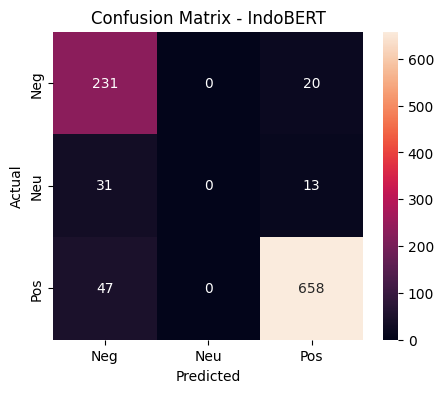

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(cm_indobert, annot=True, fmt="d",
            xticklabels=["Neg", "Neu", "Pos"],
            yticklabels=["Neg", "Neu", "Pos"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - IndoBERT")
plt.show()


In [56]:
model.save_pretrained("/content/drive/MyDrive/uap/indobert_model")
tokenizer.save_pretrained("/content/drive/MyDrive/uap/indobert_model")

print("Model IndoBERT berhasil disimpan")


Model IndoBERT berhasil disimpan


DISTILBERT MULTILINGUAL

In [57]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

from datasets import Dataset
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments
)

from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    classification_report,
    confusion_matrix
)


In [58]:
model_name_distil = "distilbert-base-multilingual-cased"

tokenizer_distil = AutoTokenizer.from_pretrained(model_name_distil)
model_distil = AutoModelForSequenceClassification.from_pretrained(
    model_name_distil,
    num_labels=3
)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [59]:
train_ds_distil = Dataset.from_dict({
    "text": X_train.tolist(),
    "label": y_train.tolist()
})

test_ds_distil = Dataset.from_dict({
    "text": X_test.tolist(),
    "label": y_test.tolist()
})

# Batasi agar training realistis
train_ds_distil = train_ds_distil.shuffle(seed=42).select(range(5000))
test_ds_distil  = test_ds_distil.shuffle(seed=42).select(range(1000))


In [60]:
def tokenize_distil(batch):
    return tokenizer_distil(
        batch["text"],
        padding="max_length",
        truncation=True,
        max_length=128
    )

train_ds_distil = train_ds_distil.map(tokenize_distil, batched=True)
test_ds_distil  = test_ds_distil.map(tokenize_distil, batched=True)

train_ds_distil.set_format(
    "torch", columns=["input_ids", "attention_mask", "label"]
)
test_ds_distil.set_format(
    "torch", columns=["input_ids", "attention_mask", "label"]
)

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [61]:
def compute_metrics_distil(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(axis=1)

    precision, recall, f1, _ = precision_recall_fscore_support(
        labels, preds, average="weighted"
    )
    acc = accuracy_score(labels, preds)

    return {
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }

In [62]:
training_args_distil = TrainingArguments(
    output_dir="./results_distil",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,      # ⬅️ cukup 1 epoch
    logging_steps=50,
    save_strategy="no",
    report_to="none"         # ⬅️ MATIKAN W&B
)

In [63]:
trainer_distil = Trainer(
    model=model_distil,
    args=training_args_distil,
    train_dataset=train_ds_distil,
    eval_dataset=test_ds_distil,
    compute_metrics=compute_metrics_distil
)

In [64]:
trainer_distil.train()

Step,Training Loss
50,0.694400
100,0.541800
150,0.428000
200,0.440600
250,0.418500
300,0.416000


TrainOutput(global_step=313, training_loss=0.48622920642645595, metrics={'train_runtime': 59.4157, 'train_samples_per_second': 84.153, 'train_steps_per_second': 5.268, 'total_flos': 165587201280000.0, 'train_loss': 0.48622920642645595, 'epoch': 1.0})

In [65]:
eval_results_distil = trainer_distil.evaluate()
eval_results_distil

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'eval_loss': 0.43165937066078186,
 'eval_accuracy': 0.852,
 'eval_precision': 0.817702380952381,
 'eval_recall': 0.852,
 'eval_f1': 0.8342140549112896,
 'eval_runtime': 3.7011,
 'eval_samples_per_second': 270.189,
 'eval_steps_per_second': 17.022,
 'epoch': 1.0}

In [66]:
preds_distil = trainer_distil.predict(test_ds_distil)
y_pred_distil = np.argmax(preds_distil.predictions, axis=1)

y_test_subset_distil = np.array(test_ds_distil["label"])

print(classification_report(
    y_test_subset_distil,
    y_pred_distil,
    target_names=["negative", "neutral", "positive"]
))

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    negative       0.71      0.80      0.75       251
     neutral       0.00      0.00      0.00        44
    positive       0.91      0.92      0.92       705

    accuracy                           0.85      1000
   macro avg       0.54      0.57      0.56      1000
weighted avg       0.82      0.85      0.83      1000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [67]:
cm_distil = confusion_matrix(y_test_subset_distil, y_pred_distil)
cm_distil

array([[200,   0,  51],
       [ 27,   0,  17],
       [ 53,   0, 652]])

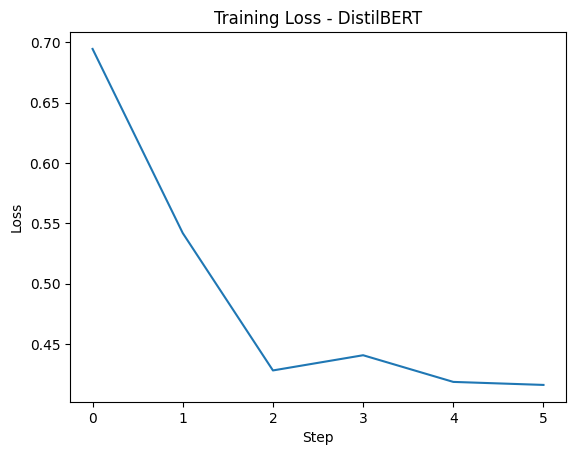

In [68]:
logs_distil = pd.DataFrame(trainer_distil.state.log_history)
logs_distil = logs_distil[logs_distil["loss"].notna()]

plt.figure()
plt.plot(logs_distil["loss"])
plt.title("Training Loss - DistilBERT")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.show()

In [69]:
model_distil.save_pretrained("/content/drive/MyDrive/uap/distilbert_model")
tokenizer_distil.save_pretrained("/content/drive/MyDrive/uap/distilbert_model")

print("Model DistilBERT berhasil disimpan")


Model DistilBERT berhasil disimpan


model akurasi

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

labels = ["Negative", "Neutral", "Positive"]

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=labels,
        yticklabels=labels
    )
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()


In [75]:
from sklearn.metrics import classification_report

y_pred = model_lstm.predict(X_test_pad)
y_pred_label = y_pred.argmax(axis=1)

print(classification_report(
    y_test,
    y_pred_label,
    target_names=['negative', 'neutral', 'positive']
))

1406/1406 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step
              precision    recall  f1-score   support

    negative       0.47      0.92      0.62     10828
     neutral       0.00      0.00      0.00      1890
    positive       0.95      0.70      0.80     32260

    accuracy                           0.72     44978
   macro avg       0.47      0.54      0.48     44978
weighted avg       0.79      0.72      0.73     44978



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


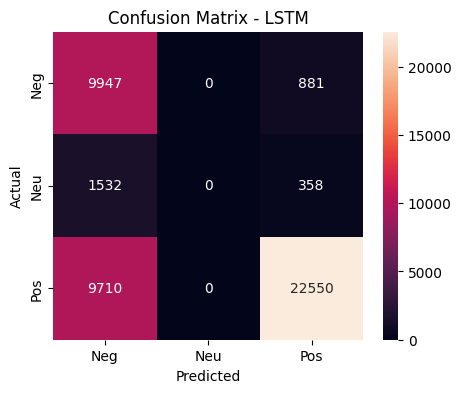

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_lstm = confusion_matrix(y_test, y_pred_lstm)

plt.figure(figsize=(5,4))
sns.heatmap(cm_lstm, annot=True, fmt="d",
            xticklabels=["Neg", "Neu", "Pos"],
            yticklabels=["Neg", "Neu", "Pos"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LSTM")
plt.show()


In [81]:
import numpy as np

# Prediksi menggunakan HuggingFace Trainer
predictions_indobert = trainer.predict(test_ds)

# Logits → kelas (0,1,2)
y_pred_indobert = np.argmax(predictions_indobert.predictions, axis=1)

# Label asli
y_true_indobert = predictions_indobert.label_ids

# Cek panjang (HARUS SAMA)
print(len(y_true_indobert), len(y_pred_indobert))


1000 1000


In [82]:
from sklearn.metrics import classification_report

print(classification_report(
    y_true_indobert,
    y_pred_indobert,
    target_names=["negative", "neutral", "positive"]
))


              precision    recall  f1-score   support

    negative       0.75      0.92      0.82       251
     neutral       0.00      0.00      0.00        44
    positive       0.95      0.93      0.94       705

    accuracy                           0.89      1000
   macro avg       0.57      0.62      0.59      1000
weighted avg       0.86      0.89      0.87      1000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


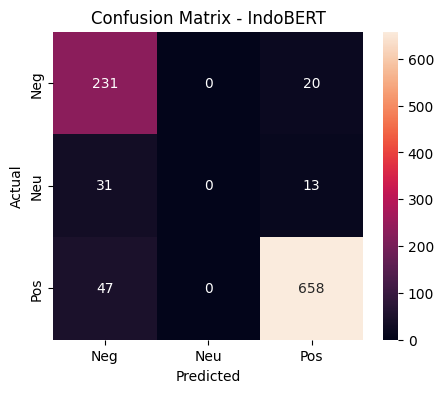

In [83]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_indobert = confusion_matrix(y_true_indobert, y_pred_indobert)

plt.figure(figsize=(5,4))
sns.heatmap(cm_indobert, annot=True, fmt="d",
            xticklabels=["Neg", "Neu", "Pos"],
            yticklabels=["Neg", "Neu", "Pos"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - IndoBERT")
plt.show()


In [84]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

MODEL_DISTILBERT = "distilbert-base-multilingual-cased"

tokenizer_distilbert = AutoTokenizer.from_pretrained(MODEL_DISTILBERT)

model_distilbert = AutoModelForSequenceClassification.from_pretrained(
    MODEL_DISTILBERT,
    num_labels=3
)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [85]:
def tokenize_distilbert(batch):
    return tokenizer_distilbert(
        batch["text"],
        padding=True,
        truncation=True,
        max_length=128
    )

train_ds_distil = train_ds.map(tokenize_distilbert, batched=True)
test_ds_distil  = test_ds.map(tokenize_distilbert, batched=True)

train_ds_distil.set_format(
    "torch",
    columns=["input_ids", "attention_mask", "label"]
)
test_ds_distil.set_format(
    "torch",
    columns=["input_ids", "attention_mask", "label"]
)


Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [87]:
from transformers import TrainingArguments

training_args_distil = TrainingArguments(
    output_dir="./results_distilbert",
    eval_strategy="epoch",        # ⬅️ PERUBAHAN DI SINI
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    weight_decay=0.01,
    logging_steps=100,
    load_best_model_at_end=True,
    report_to="none"              # MATIKAN wandb
)


In [89]:
from transformers import Trainer

trainer_distilbert = Trainer(
    model=model_distilbert,
    args=training_args_distil,
    train_dataset=train_ds_distil,
    eval_dataset=test_ds_distil,
    tokenizer=tokenizer_distilbert
)


/tmp/ipython-input-683865955.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_distilbert = Trainer(


In [90]:
trainer_distilbert.train()


Epoch,Training Loss,Validation Loss
1,0.417400,0.431600


TrainOutput(global_step=313, training_loss=0.48632789648379, metrics={'train_runtime': 77.7057, 'train_samples_per_second': 64.345, 'train_steps_per_second': 4.028, 'total_flos': 165587201280000.0, 'train_loss': 0.48632789648379, 'epoch': 1.0})

In [91]:
import numpy as np

pred_distilbert = trainer_distilbert.predict(test_ds_distil)

y_pred_distilbert = np.argmax(pred_distilbert.predictions, axis=1)
y_true_distilbert = pred_distilbert.label_ids

print(len(y_true_distilbert), len(y_pred_distilbert))


1000 1000


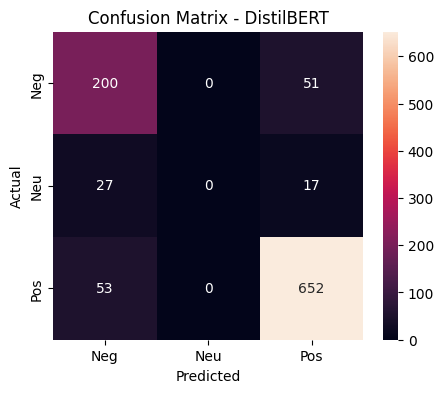

In [92]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_distilbert = confusion_matrix(y_true_distilbert, y_pred_distilbert)

plt.figure(figsize=(5,4))
sns.heatmap(cm_distilbert, annot=True, fmt="d",
            xticklabels=["Neg", "Neu", "Pos"],
            yticklabels=["Neg", "Neu", "Pos"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - DistilBERT")
plt.show()


In [94]:
globals().keys()


dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', '_', '__', '___', '_i', '_ii', '_iii', '_i1', 'pd', 'np', '_i2', 'drive', '_i3', '_i4', 'dataset_path', '_i5', 'df', '_i6', '_i7', '_i8', '_8', '_i9', '_9', '_i10', '_10', '_i11', 'rating_to_sentiment', '_11', '_i12', '_12', '_i13', 'df_clean', '_i14', 'clean_path', '_i15', 'df_process', '_i16', 'stopwords_id', '_i17', '_i18', '_18', '_i19', '_i20', 'process_path', '_i21', 'df_model', '_21', '_i22', '_22', '_i23', 'label_mapping', '_23', '_i24', 'X', 'y', '_i25', 'train_test_split', 'X_train', 'X_test', 'y_train', 'y_test', '_i26', '_i27', 'tf', 'Sequential', 'Embedding', 'LSTM', 'Dense', 'Dropout', 'Tokenizer', 'pad_sequences', 'to_categorical', '_i28', '_i29', 'max_words', 'tokenizer', 'X_train_seq', 'X_test_seq', '_i30', 'max_len', 'X_train_pad', 'X_test_pad', '_30', '_i31', 'y_train_cat', 'y_test_cat', '_31', '_i3

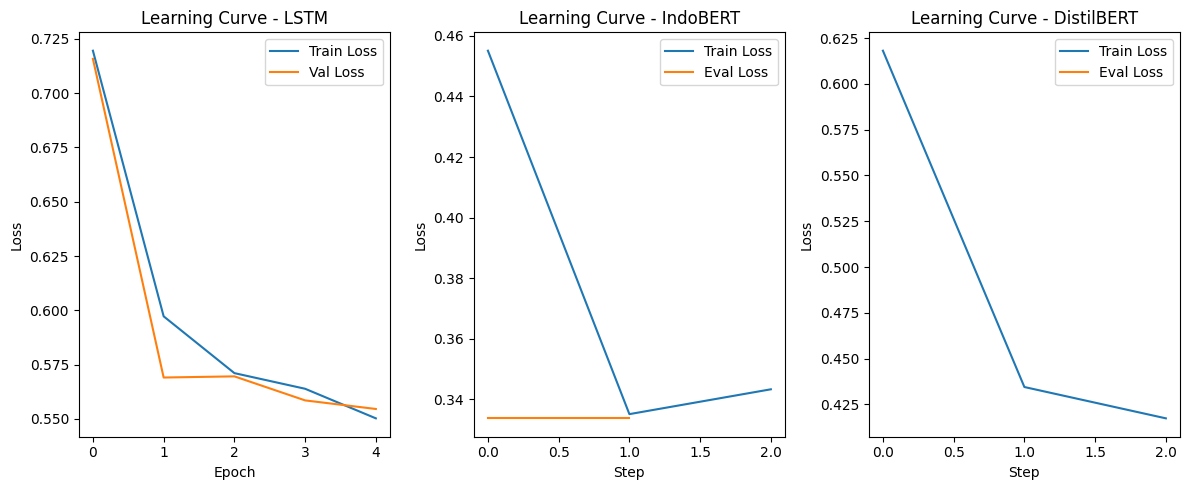

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# ======================
# 1️⃣ LSTM (Keras)
# ======================
plt.subplot(1,3,1)
plt.plot(history_lstm.history["loss"], label="Train Loss")
plt.plot(history_lstm.history["val_loss"], label="Val Loss")
plt.title("Learning Curve - LSTM")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# ======================
# 2️⃣ IndoBERT (Trainer)
# ======================
logs_indobert = trainer.state.log_history

train_loss_indobert = [log["loss"] for log in logs_indobert if "loss" in log]
eval_loss_indobert  = [log["eval_loss"] for log in logs_indobert if "eval_loss" in log]

plt.subplot(1,3,2)
plt.plot(train_loss_indobert, label="Train Loss")
plt.plot(eval_loss_indobert, label="Eval Loss")
plt.title("Learning Curve - IndoBERT")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.legend()

# ======================
# 3️⃣ DistilBERT (Trainer)
# ======================
logs_distilbert = trainer_distilbert.state.log_history

train_loss_distil = [log["loss"] for log in logs_distilbert if "loss" in log]
eval_loss_distil  = [log["eval_loss"] for log in logs_distilbert if "eval_loss" in log]

plt.subplot(1,3,3)
plt.plot(train_loss_distil, label="Train Loss")
plt.plot(eval_loss_distil, label="Eval Loss")
plt.title("Learning Curve - DistilBERT")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


In [96]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# ======================
# 1️⃣ LSTM
# ======================
acc_lstm = accuracy_score(y_test, y_pred_lstm)
prec_lstm, rec_lstm, f1_lstm, _ = precision_recall_fscore_support(
    y_test, y_pred_lstm, average="macro"
)

# ======================
# 2️⃣ IndoBERT
# ======================
acc_indobert = accuracy_score(y_true_indobert, y_pred_indobert)
prec_indobert, rec_indobert, f1_indobert, _ = precision_recall_fscore_support(
    y_true_indobert, y_pred_indobert, average="macro"
)

# ======================
# 3️⃣ DistilBERT
# ======================
acc_distil = accuracy_score(y_true_distilbert, y_pred_distilbert)
prec_distil, rec_distil, f1_distil, _ = precision_recall_fscore_support(
    y_true_distilbert, y_pred_distilbert, average="macro"
)

# ======================
# BUAT TABEL
# ======================
df_comparison = pd.DataFrame({
    "Model": ["LSTM", "IndoBERT", "DistilBERT"],
    "Accuracy": [acc_lstm, acc_indobert, acc_distil],
    "Precision (Macro)": [prec_lstm, prec_indobert, prec_distil],
    "Recall (Macro)": [rec_lstm, rec_indobert, rec_distil],
    "F1-score (Macro)": [f1_lstm, f1_indobert, f1_distil]
})

df_comparison


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,Precision (Macro),Recall (Macro),F1-score (Macro)
0,LSTM,0.722509,0.472453,0.539215,0.475337
1,IndoBERT,0.889000,0.566605,0.617884,0.589231
2,DistilBERT,0.852000,0.539947,0.573878,0.556128


repo

In [103]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Pastikan folder images ada
os.makedirs("images", exist_ok=True)

def save_confusion_matrix(y_true, y_pred, title, filename):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Neg", "Neu", "Pos"],
                yticklabels=["Neg", "Neu", "Pos"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.tight_layout()
    plt.savefig(f"images/{filename}")
    plt.close()


In [104]:
# LSTM
save_confusion_matrix(
    y_test,
    y_pred_lstm,
    "Confusion Matrix - LSTM",
    "cm_lstm.png"
)

# IndoBERT
save_confusion_matrix(
    y_true_indobert,
    y_pred_indobert,
    "Confusion Matrix - IndoBERT",
    "cm_indobert.png"
)

# DistilBERT
save_confusion_matrix(
    y_true_distilbert,
    y_pred_distilbert,
    "Confusion Matrix - DistilBERT",
    "cm_distilbert.png"
)


In [105]:
# Learning Curve LSTM
plt.figure(figsize=(6,4))
plt.plot(history_lstm.history["loss"], label="Train Loss")
plt.plot(history_lstm.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Learning Curve - LSTM")
plt.legend()
plt.tight_layout()
plt.savefig("images/lc_lstm.png")
plt.close()


In [106]:
logs_indobert = trainer.state.log_history
train_loss_indobert = [l["loss"] for l in logs_indobert if "loss" in l]
eval_loss_indobert  = [l["eval_loss"] for l in logs_indobert if "eval_loss" in l]

plt.figure(figsize=(6,4))
plt.plot(train_loss_indobert, label="Train Loss")
plt.plot(eval_loss_indobert, label="Eval Loss")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.title("Learning Curve - IndoBERT")
plt.legend()
plt.tight_layout()
plt.savefig("images/lc_indobert.png")
plt.close()


In [107]:
logs_distilbert = trainer_distilbert.state.log_history
train_loss_distil = [l["loss"] for l in logs_distilbert if "loss" in l]
eval_loss_distil  = [l["eval_loss"] for l in logs_distilbert if "eval_loss" in l]

plt.figure(figsize=(6,4))
plt.plot(train_loss_distil, label="Train Loss")
plt.plot(eval_loss_distil, label="Eval Loss")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.title("Learning Curve - DistilBERT")
plt.legend()
plt.tight_layout()
plt.savefig("images/lc_distilbert.png")
plt.close()
